In [1]:
!pip install openpyxl
!pip install imbalanced-learn
!pip3 install ipympl
!pip install shapely

!pip install SciencePlots
!pip install pandas
!pip install seaborn
!pip install tqdm


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import os, sys
from numpy import nan
import re
import ipympl
# from IPython.core.display import display, HTML
import json
from os import listdir
import glob
import math
from IPython.display import Image, display, HTML
from shapely.geometry import mapping
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, mean_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut, cross_validate
from sklearn.impute import SimpleImputer
from tqdm.notebook import tqdm
from sklearn.svm import SVC
from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE
from scipy.stats import ks_2samp
from scipy import stats
np.seterr(divide='ignore', invalid='ignore')
pd.options.display.max_columns = 100
%matplotlib inline

# Step 1: Data Acquisition

In [2]:
maize_data = pd.read_csv('maize_2018_2019_unl_spectra.csv')
mf = maize_data
mr = pd.read_csv('maize_2018_2019_unl_traits.csv')

#idx = mf.index
# mf.head(5)
print(mf.shape)
print(mf['ID'].max())

mf = mf.set_index("ID")
mr = mr.set_index("ID")
#mf.tail(50)
#mf.iloc[1232, :]

(1210, 2152)
1271


In [114]:
print(mf.isnull().sum().sum())
print(mr.isnull().sum().sum())

0
0


In [115]:
mf.head(5)

,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.106430,0.098860,0.088910,0.077947,0.072843,0.093862,0.090015,0.070006,0.090431,0.084056,0.073512,0.073086,0.067475,0.068706,0.068850,0.063061,0.064384,0.066461,0.070936,0.078129,0.069275,0.064903,0.067154,0.065122,0.060868,0.058503,0.059176,0.060199,0.059542,0.056787,0.053711,0.056561,0.059718,0.059836,0.056556,0.059190,0.057359,0.052478,0.053686,0.054506,0.055347,0.055851,0.053617,0.055252,0.058038,0.058547,0.057006,0.056262,0.055866,0.054559,...,0.056319,0.055844,0.055375,0.055058,0.054726,0.054421,0.054162,0.053836,0.053488,0.053203,0.052905,0.052548,0.052264,0.051997,0.051595,0.051157,0.050832,0.050384,0.049892,0.049764,0.049538,0.049473,0.049243,0.048725,0.048397,0.048044,0.047772,0.047821,0.047637,0.047205,0.046992,0.046813,0.046602,0.046607,0.046481,0.046230,0.045912,0.045301,0.045138,0.045353,0.045184,0.045096,0.045050,0.044625,0.044355,0.044527,0.044399,0.043810,0.043605,0.043599
2,0.097093,0.103140,0.083749,0.066028,0.072148,0.087739,0.098567,0.092104,0.062686,0.095519,0.107648,0.072792,0.071982,0.077794,0.071373,0.050405,0.051561,0.051083,0.053461,0.064439,0.047219,0.043872,0.056082,0.057424,0.058312,0.060843,0.060995,0.048972,0.051361,0.049914,0.036760,0.052602,0.054866,0.049009,0.052006,0.052774,0.050657,0.049641,0.054484,0.047719,0.044079,0.048591,0.048487,0.048350,0.048275,0.047974,0.048457,0.048776,0.048339,0.047229,...,0.047114,0.046864,0.046694,0.046366,0.045964,0.045663,0.045325,0.045112,0.044898,0.044548,0.044306,0.044098,0.043800,0.043470,0.043094,0.042753,0.042579,0.042447,0.042235,0.042065,0.041800,0.041422,0.041198,0.041026,0.040759,0.040543,0.040383,0.040137,0.039915,0.039878,0.039731,0.039409,0.039179,0.038988,0.038808,0.038687,0.038522,0.038289,0.038160,0.038160,0.038003,0.037762,0.037672,0.037440,0.037419,0.037894,0.037886,0.037521,0.037509,0.037503
3,0.125163,0.124518,0.127662,0.127982,0.127173,0.115487,0.111536,0.112970,0.100015,0.079823,0.082658,0.102968,0.088516,0.094781,0.094515,0.070130,0.074827,0.079704,0.075530,0.064953,0.070498,0.072435,0.068536,0.068483,0.070248,0.065726,0.058498,0.066385,0.070785,0.069656,0.066325,0.068654,0.066584,0.063986,0.066945,0.068194,0.069426,0.069469,0.065436,0.058559,0.057705,0.061731,0.055525,0.059083,0.065252,0.065030,0.058985,0.062260,0.068849,0.067385,...,0.055637,0.055295,0.055052,0.054888,0.054461,0.054179,0.054169,0.053794,0.053397,0.053165,0.052658,0.052337,0.052304,0.051942,0.051510,0.051305,0.051045,0.050822,0.050715,0.050409,0.050127,0.049959,0.049740,0.049392,0.049137,0.048937,0.048751,0.048657,0.048485,0.048162,0.048046,0.048203,0.048045,0.047810,0.047612,0.047058,0.046735,0.046689,0.046588,0.046480,0.046410,0.046467,0.046406,0.046281,0.046181,0.046085,0.045880,0.045441,0.045417,0.045704
4,0.101250,0.094361,0.086309,0.090478,0.107267,0.088325,0.076786,0.083318,0.080874,0.084091,0.084152,0.079871,0.085310,0.087679,0.079508,0.062870,0.059119,0.068288,0.075749,0.069223,0.066564,0.066067,0.066501,0.067355,0.066727,0.062973,0.059307,0.064315,0.064843,0.063219,0.062928,0.062292,0.062633,0.062704,0.061520,0.063693,0.063807,0.061729,0.061046,0.060998,0.061302,0.061599,0.061438,0.063316,0.064415,0.062895,0.062514,0.061758,0.062089,0.064964,...,0.063220,0.062894,0.062567,0.062176,0.061807,0.061366,0.060850,0.060529,0.060285,0.059850,0.059491,0.059236,0.058814,0.058425,0.058187,0.057785,0.057324,0.057021,0.056671,0.056601,0.056302,0.055740,0.055415,0.055086,0.054752,0.054657,0.054514,0.054307,0.054005,0.0536

In [116]:
mr.head(5)

,Nitrogen,Phosphorus,Potassium,Chlorophyll,Leaf_Dry_Weight,Leaf_Fresh_Weight,Leaf_Area
ID,,,,,,,
1,2.96,0.22,1.78,476.60,8.46,30.70,1420.57
2,3.11,0.48,2.74,492.17,6.69,27.55,1144.10
3,2.94,0.39,2.45,428.91,6.16,25.15,898.15
4,3.62,0.41,1.94,554.80,7.54,28.90,1387.85
5,2.48,0.27,1.41,425.94,12.01,51.35,2269.29


In [117]:
frN = pd.merge(mf, mr[["Nitrogen"]], on='ID', how='inner')    # nested bracket in mr[["Nitrogen"]] for data frame
frN = frN.sort_values(by=["Nitrogen"])         # samples spectral sig sorted by increasing "Nitrogen" content

frP = pd.merge(mf, mr[["Phosphorus"]], on='ID', how='inner')
frP = frP.sort_values(by=["Phosphorus"])       # samples spectral sig sorted by increasing "Phosphorus" content

frK = pd.merge(mf, mr[["Potassium"]], on='ID', how='inner')
frK = frK.sort_values(by=["Potassium"])       # samples spectral sig sorted by increasing "Potassium" content
frN
frP

,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,...,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500,Phosphorus
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1031,0.086466,0.058991,0.062532,0.071406,0.043613,0.051488,0.064647,0.068555,0.067093,0.069333,0.066244,0.058397,0.063452,0.073986,0.069450,0.047316,0.058994,0.061216,0.058418,0.065630,0.062665,0.058509,0.056426,0.054172,0.049626,0.047182,0.049379,0.055472,0.050143,0.042139,0.040576,0.042160,0.047121,0.051597,0.051525,0.046645,0.044457,0.046311,0.048717,0.049668,0.047610,0.045521,0.051815,0.051187,0.047812,0.047649,0.049173,0.049052,0.048690,0.050263,...,0.052031,0.051748,0.051366,0.050995,0.050670,0.050227,0.049953,0.049691,0.049175,0.048751,0.048398,0.047983,0.047624,0.047336,0.047070,0.046797,0.046550,0.046232,0.045842,0.045520,0.045361,0.045104,0.044738,0.044460,0.044165,0.043929,0.043887,0.043678,0.043367,0.043119,0.042731,0.042457,0.042350,0.042155,0.042000,0.041790,0.041432,0.041198,0.041036,0.040817,0.040621,0.040480,0.040341,0.040144,0.039963,0.039841,0.039675,0.039521,0.039427,0.16
533,0.054452,0.070671,0.062207,0.042437,0.048488,0.098390,0.085512,0.026606,0.037244,0.064748,0.066704,0.042246,0.041927,0.042209,0.046872,0.056983,0.055656,0.039398,0.023384,0.026732,0.049073,0.051579,0.038650,0.039423,0.042851,0.042580,0.038978,0.039306,0.046358,0.048163,0.040774,0.045636,0.044974,0.039710,0.037461,0.044736,0.048649,0.046003,0.041087,0.037994,0.037567,0.040215,0.046460,0.046161,0.043455,0.043519,0.045086,0.043923,0.044795,0.052143,...,0.046309,0.045968,0.045667,0.045331,0.045055,0.044723,0.044251,0.043927,0.043687,0.043435,0.043337,0.043106,0.042648,0.042347,0.042138,0.041840,0.041540,0.041235,0.040894,0.040586,0.040301,0.040097,0.039988,0.039813,0.039727,0.039546,0.039176,0.038914,0.038614,0.038446,0.038533,0.038399,0.038126,0.038029,0.037961,0.037785,0.037742,0.037606,0.037161,0.036916,0.036899,0.036725,0.036395,0.036296,0.036337,0.036219,0.036264,0.036141,0.035647,0.16
293,0.120969,0.113881,0.111758,0.113769,0.096529,0.079659,0.074985,0.083301,0.094573,0.087286,0.078337,0.075694,0.066897,0.061710,0.063958,0.071174,0.071844,0.062866,0.059163,0.070240,0.050175,0.046704,0.063184,0.070325,0.065076,0.059381,0.060481,0.066822,0.059098,0.048145,0.046898,0.054950,0.053749,0.045725,0.041275,0.047398,0.050881,0.050949,0.055166,0.056721,0.053526,0.047771,0.046117,0.049412,0.052164,0.051460,0.054739,0.057739,0.057242,0.052980,...,0.049528,0.049116,0.048815,0.048578,0.048302,0.048133,0.047842,0.047392,0.046966,0.046683,0.046568,0.046365,0.046106,0.045789,0.045339,0.045027,0.044831,0.044561,0.044476,0.044260,0.043957,0.043725,0.043370,0.043107,0.042993,0.042902,0.042940,0.042824,0.042642,0.042458,0.042107,0.041882,0.041751,0.041608,0.041539,0.041398,0.041241,0.041065,0.040706,0.040581,0.040713,0.040627,0.040598,0.040455,0.039982,0.039730,0.039512,0.039485,0.039742,0.17
871,0.069150,0.023355,0.043001,0.083226,0.060921,0.066077,0.076378,0.067949,0.027870,0.040700,0.067541,0.070875,0.041854,0.052978,0.066651,0.051549,0.053800,0.056357,0.051650,0.040846,0.049503,0.051413,0.042703,0.036188,0.040145,0.042101,0.038893,0.040910,0.038392,0.036830,0.039795,0.038352,0.036068,0.034974,0.036312,0.039650,0.037820,0.033572,0.035590,0.037431,0.037132,0.035938,0.038288,0.039946,0.040355,0.039967,0.039017,0.037629,0.037449,0.039411,...,0.043508,0.043193,0.042775,0.042424,0.042104,0.041707,0.041357,0.041013,0.040614,0.040237,0.040093,0.039959,0.039613,0.039291,0.038816,0.038230,0.037997,0.037934,0.037754,0.037540,0.037182,0.036902,0.036798,0.036490,0.035870,0.035593,0.035490,0.035232,0.035187,0.0

In [118]:
# frN = mf.copy()
# frK = mf.copy()
# frP = mf.copy()

# frN ['N']= mr[["Nitrogen"]]
# frN = frN.sort_values(by=['N'])     # samples spectral sig sorted by increasing "Nitrogen" content

# frP ['P']= mr[["Phosphorus"]]
# frP = frP.sort_values(by=['P'])    # samples spectral sig sorted by increasing "Phosphorus" content

# frK ['K']= mr["Potassium"]
# frK = frK.sort_values(by=['K'])    # samples spectral sig sorted by increasing "Potassium" content

print(frK)

           350       351       352       353       354       355       356  \
ID                                                                           
1137  0.090384  0.114971  0.114816  0.092455  0.081665  0.091270  0.094203   
1135  0.072732  0.071767  0.085726  0.094371  0.071926  0.065011  0.072651   
35    0.096900  0.106372  0.103029  0.093360  0.097688  0.109933  0.095412   
1098  0.052848  0.055504  0.092723  0.126040  0.111136  0.106570  0.084342   
103   0.062059  0.074041  0.083268  0.101137  0.125164  0.078372  0.064224   
...        ...       ...       ...       ...       ...       ...       ...   
585   0.104093  0.093738  0.083917  0.081568  0.081860  0.096544  0.112237   
17    0.109005  0.135380  0.118013  0.075240  0.075714  0.095631  0.107576   
113   0.048415  0.093500  0.103495  0.078667  0.052056  0.067289  0.073761   
674   0.130420  0.109314  0.111816  0.117918  0.091148  0.090437  0.088416   
106   0.056199  0.101872  0.106547  0.077452  0.058630  0.070693

In [126]:
xN = frN.index        # contains IDs for sample by increasing "Nitrogen" content
xP = frP.index
xK = frK.index        # contains IDs for sample by increasing "Potasium" content

n = xN.size      # number of samples = 1210
n
xN[19]
mf.loc[1231,:]


350     0.113428
351     0.034133
352     0.045377
353     0.104634
354     0.106198
          ...   
2496    0.054921
2497    0.054702
2498    0.054499
2499    0.054371
2500    0.054277
Name: 1231, Length: 2151, dtype: float64

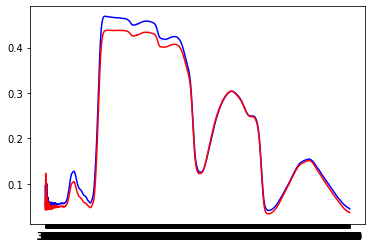

In [120]:
plt.plot(frK.iloc[xK[1], :2150], c='blue')
plt.plot(frK.iloc[xK[1209], :2150], c= 'red')
#plt.plot(frK.iloc[xK[500], :2150], c= 'cyan')

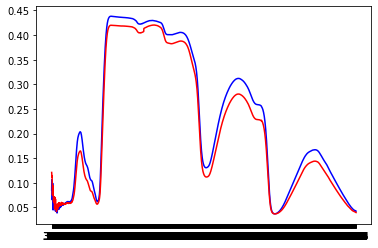

In [69]:

plt.plot(frN.iloc[xN[1], :2150], c='blue')
plt.plot(frN.iloc[xN[1209], :2150], c= 'red')

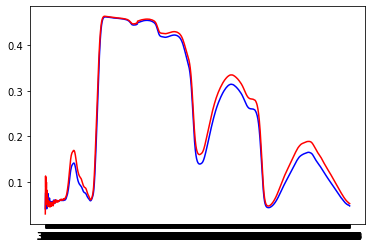

In [73]:
n = xN.size      # number of samples
plt.plot(frP.iloc[xP[1], :2150], c='blue')
plt.plot(frP.iloc[xP[1209], :2150], c= 'red')

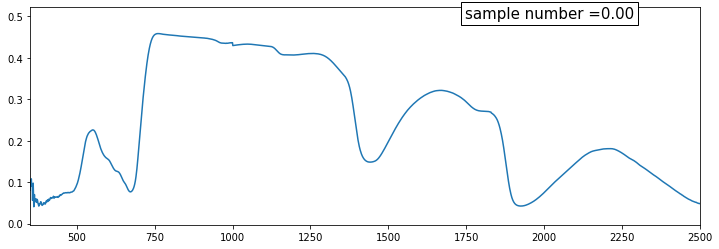

In [145]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

fig, ax = plt.subplots(1,1, figsize = (12,4))
ln1, = plt.plot([],[])

text_Ncontent = ax.text(0.65,0.95,'',fontsize =15, transform = ax.transAxes, bbox = dict(facecolor= 'white', edgecolor='black'))  

y_max = mf.max().max()
y_min = mf.min().min()

x_min = 350 
x_max = 2500
x= np.arange(350,2501,1)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
# x
# mf.loc[1232,:]

# x.shape
# type(x)
#ln1.set_data (x, mf.loc[1232,:])


def animate (i):
    ln1.set_data (x, mf.loc[xN[i],:])
    text_Ncontent.set_text('sample number ={:.2f}'.format(i))
    
ani = animation.FuncAnimation(fig, animate, frames=1000)
ani.save('ani.gif', writer= 'pillow', fps=50, dpi= 100)

# def animate(i):
#     ln1.set_data (xN[i], frN.iloc[xN[i],[1:-1])


# yK = frK.loc[xK[1], :]
# yK[1:-1]

# plt.plot(yK[1:-1])

In [61]:
rNs = rN.squeeze() # converting to series for later use in argsort
N_inc = rNs.argsort()
N_inc.head(5)

0    319
1    303
2    270
3    314
4    317
Name: Nitrogen, dtype: int64

4.21

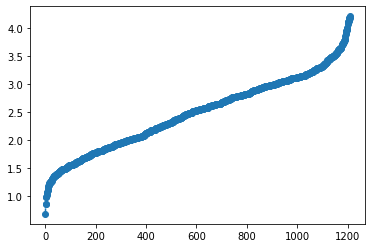

In [76]:
N = rNs[N_inc]
N.head(15)
#plt.plot(N,'o')
plt.plot(idx,N, 'o--')
fN = mf.iloc[N_inc, :]   # sorting sample reflectance data by increasing content of Nitrogen
fN.head(5) 
mf.head(5)
rN.head(5)
frN = mf
frN.head(5)
frN ['N'] = rN
frN ['N'].min()
frN ['N'].max()

# Step 2: Data Preprocessing 

In [77]:
mdf.isnull().sum()
mdr.isnull().sum()

ID                   0
Nitrogen             0
Phosphorus           0
Potassium            0
Chlorophyll          0
Leaf_Dry_Weight      0
Leaf_Fresh_Weight    0
Leaf_Area            0
dtype: int64

In [182]:
X = mdf

# getting yN, yP, and yK in series form for the input of train-test split ahead   
yN = mdrN
yN = yN.iloc[: , 0]

yP = mdrP
yP = yP.iloc[: , 0]

yK = mdrK
yK = yK.iloc[: , 0]


# Step 3:  Train-Test Split  and its Goodness

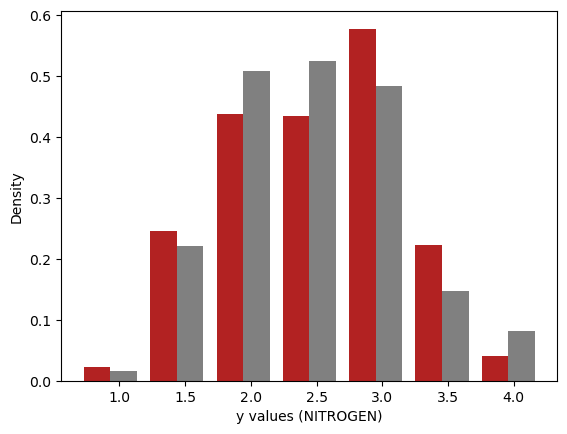

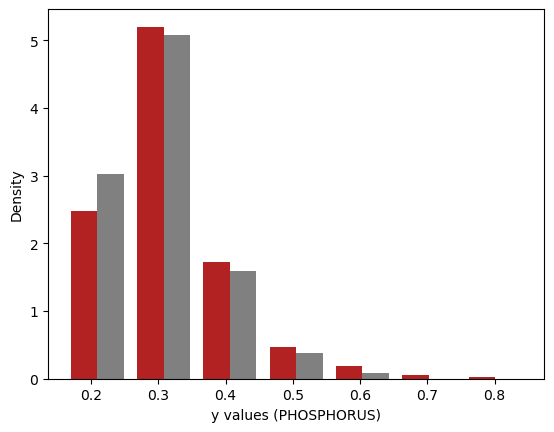

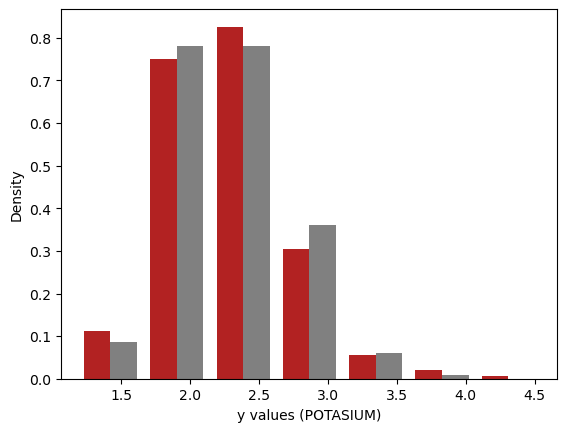

In [231]:
rand_st = 14
tst_siz = 0.2

# Train test split for Nitrogen
XN_train, XN_test,yN_train, yN_test = train_test_split(X, yN, test_size = tst_siz, random_state = rand_st)
# ks2_test = ks_2samp(yN_train, yN_test)      ---> uncomment to identify source of error?

# Train test split for Phosphorous
XP_train, XP_test, yP_train, yP_test = train_test_split(X, yP, test_size = tst_siz, random_state = rand_st)

# Train test split for Potasium
XK_train, XK_test, yK_train, yK_test = train_test_split(X, yK, test_size = tst_siz, random_state = rand_st)



## Plotting the Distribution of Train and Test Output Data  -----------for  Nitrogen ----
plt.style.use('seaborn-deep')
min_y = np.min(yN)
max_y = np.max(yN)

#fig, ax = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(min_y, max_y, 8)

plt.hist([yN_train, yN_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
# results in error when yN_train/ yN_test is data frame or ndarray
#ax[0].legend(loc='upper right')
plt.xlabel('y values (NITROGEN)')
plt.ylabel('Density')
plt.show()



## Plotting the Goodness of Train-Test Split  -----------for  Phosphorus ----
plt.style.use('seaborn-deep')
min_y = np.min(yP)
max_y = np.max(yP)

#fig, ax = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(min_y, max_y, 8)

plt.hist([yP_train, yP_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
# results in error when yN_train/ yN_test is data frame or ndarray
#ax[0].legend(loc='upper right')
plt.xlabel('y values (PHOSPHORUS)')
plt.ylabel('Density')
plt.show()




## Plotting the Goodness of Train-Test Split   -----------for  Potasium ----
plt.style.use('seaborn-deep')
min_y = np.min(yK)
max_y = np.max(yK)

#fig, ax = plt.subplots(1,2, figsize=(10,4))
bins = np.linspace(min_y, max_y, 8)

plt.hist([yK_train, yK_test], bins , label=['Train', 'Test'], density=True, color = ['firebrick','gray'])
# results in error when yN_train/ yN_test is data frame or ndarray
#ax[0].legend(loc='upper right')
plt.xlabel('y values (POTASIUM)')
plt.ylabel('Density')
plt.show()

# Step 4: Training the Model

        - Create a regr object
        - Apply fit function (using regr object) on training data
        - Check the weights/parameters generated by fit function 

In [232]:
from sklearn import linear_model

regrN = linear_model.LinearRegression()

regrP = linear_model.LinearRegression()

regrK = linear_model.LinearRegression()

# train the model using X_train and y_train (identified in previous step)

regrN.fit(XN_train, yN_train)
regrP.fit(XP_train, yP_train)
regrK.fit(XK_train, yK_train)

print ('Nitrogen Model')
print ('Coefficients: ', regrN.coef_)
print ('Intercept: ', regrN.intercept_)

print ('\n Phosphorus Model')
print ('Coefficients: ', regrP.coef_)
print ('Intercept: ', regrP.intercept_)

print ('\n Potasium model')
print ('Coefficients: ', regrK.coef_)
print ('Intercept: ', regrK.intercept_)

Nitrogen Model
Coefficients:  [ 8.51632898e-05  6.09979417e-02 -3.88177976e+00 ...  2.73858600e+02
 -2.83740678e+02 -2.24299304e+00]
Intercept:  4.039101287862021

 Phosphorus Model
Coefficients:  [-1.95727880e-05 -4.75499989e+00  1.00269969e+01 ...  6.88313652e+01
 -9.43927142e+01  8.45508162e+00]
Intercept:  0.6312288334580888

 Potasium model
Coefficients:  [-4.85626454e-05 -1.13762153e+01  2.20543200e+01 ... -3.26405033e+02
  3.50213848e+02 -1.79811112e+02]
Intercept:  4.946852070525116


# Step 5: Prediction on Test Data 

In [233]:
yN_pred = regrN.predict(XN_test)
yN_pred = np.round(yN_pred, 2)

yP_pred = regrP.predict(XP_test)
yP_pred = np.round(yP_pred, 2)

yK_pred = regrN.predict(XK_test)
yK_pred = np.round(yK_pred, 2)


# Step 6: Model Accuracy and Plots

Nitogen Model Accuracy
Mean Percentage Error: 19.009315235924536
Coefficient of determination- r2: 0.24615347224011175


Text(0, 0.5, 'Predicted (Nitrogen) content - YELLOW points')

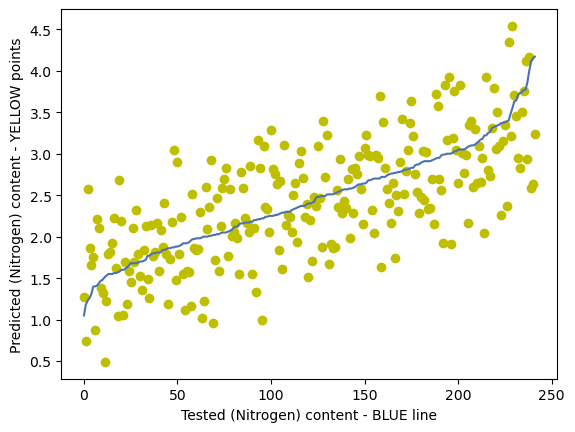

In [234]:
errorsN = np.mean(abs((yN_pred - yN_test)/yN_test))
r2N = r2_score(yN_test, yN_pred)
print('Nitogen Model Accuracy')
print('Mean Percentage Error:', errorsN*100)
print('Coefficient of determination- r2:', r2N)

# predicted points corresponding to the points on increasing y_test plot 
yN_tst = yN_test.to_numpy()
#y_pred
arg = yN_tst.argsort()
testYN = yN_tst[arg]
predYN = yN_pred[arg]
x = np.arange(0, len(testYN))
plt.plot(x, testYN)
plt.scatter(x, predYN, c='y')
plt.xlabel('Tested (Nitrogen) content - BLUE line')
plt.ylabel('Predicted (Nitrogen) content - YELLOW points')


 Phosphorus Model Accuracy
Mean Percentage Error: 40.78481593337352
Coefficient of determination- r2: -2.9189241711687206


Text(0, 0.5, 'Predicted (Phosphorus) content - YELLOW points')

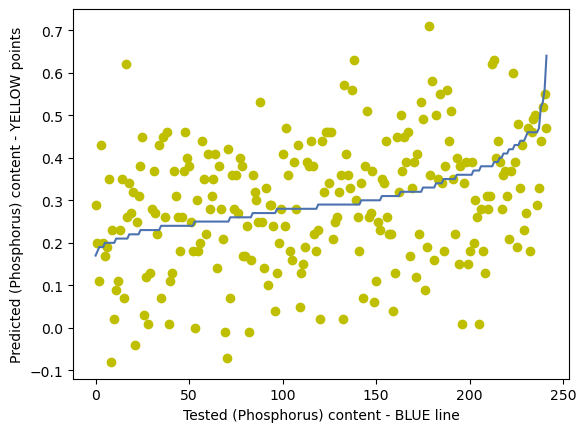

In [235]:
errorsP = np.mean(abs((yP_pred - yP_test)/yP_test))
r2P = r2_score(yP_test, yP_pred)
print('\n Phosphorus Model Accuracy')
print('Mean Percentage Error:', errorsP*100)
print('Coefficient of determination- r2:', r2P)

# predicted points corresponding to the points on increasing y_test
yP_tst = yP_test.to_numpy()
#y_pred
arg = yP_tst.argsort()
testYP = yP_tst[arg]
predYP = yP_pred[arg]
x = np.arange(0, len(testYP))
plt.plot(x, testYP)
plt.scatter(x, predYP, c='y')
plt.xlabel('Tested (Phosphorus) content - BLUE line')
plt.ylabel('Predicted (Phosphorus) content - YELLOW points')


 Potasium Model Accuracy
Mean Percentage Error: 29.41792860592339
Coefficient of determination- r2: -2.968505819652549


Text(0, 0.5, 'Predicted (Potasium) content - YELLOW points')

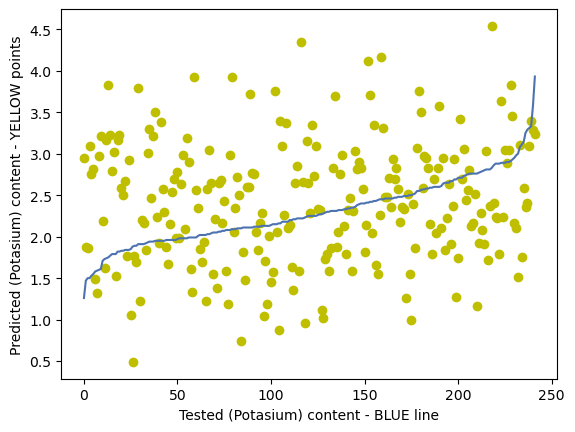

In [236]:
errorsK = np.mean(abs((yK_pred - yK_test)/yK_test))
r2K = r2_score(yK_test, yK_pred)
print('\n Potasium Model Accuracy')
print('Mean Percentage Error:', errorsK*100)
print('Coefficient of determination- r2:', r2K)

# predicted points corresponding to the points on increasing y_test
yK_tst = yK_test.to_numpy()
#y_pred
arg = yK_tst.argsort()
testYK = yK_tst[arg]
predYK = yK_pred[arg]
x = np.arange(0, len(testYK))
plt.plot(x, testYK)
plt.scatter(x, predYK, c='y')
plt.xlabel('Tested (Potasium) content - BLUE line')
plt.ylabel('Predicted (Potasium) content - YELLOW points')